# 更多贝叶斯方法相关的概念

关于贝叶斯方法，还有一些重要的概念，稍微补充下。

## 大数定律

大数定律是统计里始终会在我们的脑海中回荡的想法，但很少有专门用于统计的书籍明确提出这一想法。实际上，到目前为止，在每个示例中都使用了这个简单的想法。

令 $Z_i$ 是 来自某些概率分布的N个独立样本。根据大数定律，只要期望值E[Z] 是有限的，以下式子成立：

$\frac{1}{N} \sum_{i=1}^N Z_i \rightarrow E[ Z ],  \;\;\; N \rightarrow \infty$

换句话说：

来自同一分布的随机变量序列的平均值收敛到该分布的期望值。

这看起来似乎很无聊，但这将是在我们这整个不确定性的讨论中使用的最有用的工具。

如果上述定律有些令人惊讶，则可以通过研究一个简单的例子来使它更清晰。

考虑一个随机变量 Z，它只能取两个值 C1 和 C2。假设我们有大量的Z的样本，特定的样本表示为 $Z_i$。定律是说，我们可以通过平均所有样本近似地估计Z的期望或者说平均值：

$\frac{1}{N} \sum_{i=1}^N \;Z_i$

根据我们的构建， $Z_i$ 只能取 C1 或者 C2，因此我们可以将总和划分为以下两个值：

$\begin{align}
\frac{1}{N} \sum_{i=1}^N \;Z_i
& =\frac{1}{N} \big(  \sum_{ Z_i = c_1}c_1 + \sum_{Z_i=c_2}c_2 \big) \\\\[5pt]
& = c_1 \sum_{ Z_i = c_1}\frac{1}{N} + c_2 \sum_{ Z_i = c_2}\frac{1}{N} \\\\[5pt]
& = c_1 \times \text{ (approximate frequency of $c_1$) } \\\\ 
& \;\;\;\;\;\;\;\;\; + c_2 \times \text{ (approximate frequency of $c_2$) } \\\\[5pt]
& \approx c_1 \times P(Z = c_1) + c_2 \times P(Z = c_2 ) \\\\[5pt]
& = E[Z]
\end{align}$

相等是存于极限中的，但我们可以通过在平均值中使用越来越多的样本来变得越来越近。该定律适用于几乎所有分布

下面是例子。

下图是三个不同泊松随机变量序列的大数定律的作用的图。

我们使用参数λ = 4.5对泊松随机变量进行采样 sample_size = 100000。（回想一下泊松随机变量的期望值等于其参数。）我们计算随机变量n个 样本的平均值，n = 1 to sample_size。

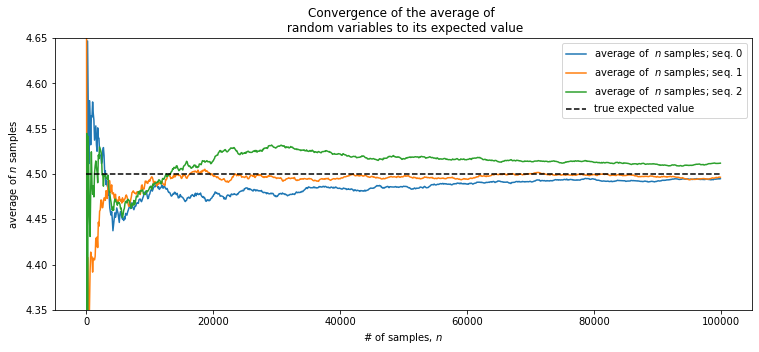

In [3]:
%matplotlib inline
import numpy as np
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt

figsize( 12.5, 5 )

sample_size = 100000
expected_value = lambda_ = 4.5
poi = np.random.poisson
N_samples = range(1,sample_size,100)

for k in range(3):

    samples = poi( lambda_, sample_size ) 
    
    partial_average = [ samples[:i].mean() for i in N_samples ]
    
    plt.plot( N_samples, partial_average, lw=1.5,label="average \
of  $n$ samples; seq. %d"%k)
    

plt.plot( N_samples, expected_value*np.ones_like( partial_average), 
    ls = "--", label = "true expected value", c = "k" )

plt.ylim( 4.35, 4.65) 
plt.title( "Convergence of the average of \n random variables to its \
expected value" )
plt.ylabel( "average of $n$ samples" )
plt.xlabel( "# of samples, $n$")
plt.legend();

从上面的图可以清楚地看出，当样本量较小时，平均值会有较大的变化（比较平均值在最初时有多大的锯齿和跳动，然后就平滑了）。所有这三个路径都接近值4.5，但只要N变大，就会收敛（数学家和统计学家起的名字）。

我们可以问的另一个非常相关的问题是我多快收敛到期望值？让我们来画些新东西。对于特定N，让我们数以千计地进行上述试验，并计算出我们平均距离真实期望值有多远。等等-平均计算？这不就是大数定律吗！

例如，我们对特定的N， 数量：

$D(N) = \sqrt{ \;E\left[\;\; \left( \frac{1}{N}\sum_{i=1}^NZ_i  - 4.5 \;\right)^2 \;\;\right] \;\;}$

以上公式可解释为对某些N，距真实值的距离（平均）。（我们取平方根，因此上述数量的维度和我们的随机变量相同）。由于以上是期望值，因此可以使用大数定律近似：不平均$Z_i$，而是多次计算以下内容并将其平均：

$Y_k = \left( \;\frac{1}{N}\sum_{i=1}^NZ_i  - 4.5 \; \right)^2$

通过计算以上式子多次，$N_y$次，（请记住，它是随机的），然后对其求平均：

$\frac{1}{N_Y} \sum_{k=1}^{N_Y} Y_k \rightarrow E[ Y_k ] = E\;\left[\;\; \left( \frac{1}{N}\sum_{i=1}^NZ_i  - 4.5 \;\right)^2 \right]$

最后，求平方根：

$\sqrt{\frac{1}{N_Y} \sum_{k=1}^{N_Y} Y_k} \approx D(N)$

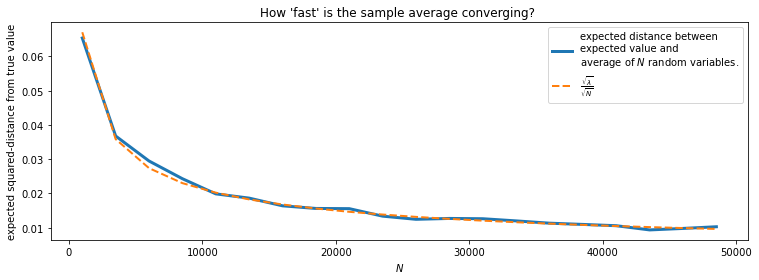

In [4]:
figsize( 12.5, 4)

N_Y = 250 #use this many to approximate D(N)
N_array = np.arange( 1000, 50000, 2500 ) #use this many samples in the approx. to the variance.
D_N_results = np.zeros( len( N_array ) )

lambda_ = 4.5 
expected_value = lambda_ #for X ~ Poi(lambda) , E[ X ] = lambda

def D_N( n ):
    """
    This function approx. D_n, the average variance of using n samples.
    """
    Z = poi( lambda_, (n, N_Y) )
    average_Z = Z.mean(axis=0)
    return np.sqrt( (  (average_Z - expected_value)**2  ).mean() )
    
    
for i,n in enumerate(N_array):
    D_N_results[i] =  D_N(n)


plt.xlabel( "$N$" )
plt.ylabel( "expected squared-distance from true value" )
plt.plot(N_array, D_N_results, lw = 3, 
            label="expected distance between\n\
expected value and \naverage of $N$ random variables.")
plt.plot( N_array, np.sqrt(expected_value)/np.sqrt(N_array), lw = 2, ls = "--", 
        label = r"$\frac{\sqrt{\lambda}}{\sqrt{N}}$" )
plt.legend()
plt.title( "How 'fast' is the sample average converging? " );

如预期的那样，样本平均值与实际预期值之间的预期距离会随着 N增大而收缩。但也请注意，收敛速度降低，也就是说，我们仅需要1万个额外的样本就可以从0.020移至0.015，相差0.005，但是还有2万个样本可以再次从0.015降低至0.010，又仅减少0.005 。

事实证明，我们可以衡量这种收敛速度。上面我画了第二行，函数$\sqrt{\lambda}/\sqrt{N}$。这不是任意选择的。在大多数情况下，给定一系列随机变量分布，例如Z，大数定律收敛到 E[ Z]速度 为：

$\frac{ \sqrt{ \; Var(Z) \; } }{\sqrt{N} }$

知道这一点很有用：对于给定的大的N，我们（平均意义上）知道我们与估算值之间的距离。另一方面，在贝叶斯设置中，这似乎是无用的结果：贝叶斯分析在不确定的情况下是可以的，因此添加超精确数字的统计意义是什么？尽管提取样本的计算成本如此之低，以至于它具有更大的 N 也可以

我们如何计算 Var(Z)？

方差只是另一个可以近似的期望值！考虑一下以下内容，一旦我们有了期望值（通过使用大数定律来估计它，就表示它μ），我们可以估算出方差：

$\frac{1}{N}\sum_{i=1}^N \;(Z_i - \mu)^2 \rightarrow E[ \;( Z - \mu)^2 \;] = Var( Z )$

期望值和估计概率之间的关系更不明显。定义指示函数：

$\mathbb{1}_A(x) = 
\begin{cases} 1 &  x \in A \\\\
              0 &  else
\end{cases}$

然后，根据大数定律，如果我们有很多样本 Xi，我们可以估计事件A的可能性 ，表示为 P（A）， ：

$\frac{1}{N} \sum_{i=1}^N \mathbb{1}_A(X_i) \rightarrow E[\mathbb{1}_A(X)] =  P(A)$

同样，经过一会儿思考，这是相当明显的：如果事件发生，指标函数仅为1，因此我们仅对事件发生的时间求和，然后除以试验总数（考虑我们通常如何使用频率来近似概率） 。例如，假设我们希望估计$Z \sim Exp(.5)$ 大于5的概率，而我们从 Ex p （.5 ） 分布中获取了很多样本，那么：

$P( Z > 5 ) =  \frac{1}{N}\sum_{i=1}^N \mathbb{1}_{z > 5 }(Z_i)$

In [6]:
N = 10000
np.mean( [ np.random.exponential( 0.5 ) > 5 for i in range(N) ] )

0.0001

这与贝叶斯统计有什么关系？

贝叶斯推断中，点估计是使用期望值来计算的。在更多的分析贝叶斯推论中，我们将需要评估以多维积分表示的复杂期望值。

如果我们可以直接从后验分布中采样，则只需要评估平均值即可。

如果精度是重要的，则上面的图将显示收敛的速度。而且，如果需要更高的准确性，只需从后方获取更多样本。

什么时候足够？什么时候可以停止从后方提取样本？这是从业者的决定，并且还取决于样本的方差（从高方差处回想起来意味着平均值收敛速度较慢）。

我们也应该理解《大数定律》何时失效。顾名思义，与上面的图形进行比较可以得到较小的ñ，该法则仅适用于大样本量。没有这个，渐近结果就不可靠。知道定律在何种情况下会失败，可以使我们对我们应该多么不自信充满信心。这块可以查看[原文](https://nbviewer.jupyter.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter4_TheGreatestTheoremNeverTold/Ch4_LawOfLargeNumbers_PyMC3.ipynb)，这里暂不翻译记录了。

## 损失函数

我们估算参数时，如何衡量参数的好坏呢，毕竟我们是不知道参数的真值的（知道了也不用估算了）。

如前面以来一直所说的那样，在贝叶斯推断中，我们有一个基本认知：即未知参数实际上是具有先验分布和后验分布的随机变量；从后验分布中得出的值是有*可能*是真实参数的。

有了这一认识，我们就可以计算与估计有关的损失。由于我们具有未知参数可能是什么值的整体的分布（后验），所以我们应该对计算给定估计值的预期损失更感兴趣。与仅比较来自后验的单个样本的给定损失相比，该预期损失是对真实损失的更好估计。

首先，解释贝叶斯点估计 很有用。现代世界中存在的系统和机械并未构建为接受后验分布作为输入。当某人只要求一个点估算时，将整个分布给ta是很粗暴的。在一个人的一天中，面对不确定性时，我们仍会通过将不确定性简化为一个动作来采取行动。同样，我们需要将后验分布精简为单个值（在多变量情况下为向量）。如果明智地选择该值，则可以避免使用频率派方法的缺点（频率派方法掩盖了不确定性），并提供更多信息。

**从贝叶斯后验中选择的该值是贝叶斯点估计**。

假定 P（θ | X） 是观察数据X后 θ的后验分布，则以下函数可以理解为选择估计值$\hat {\theta}$ 估计 ${\theta}$ 的预期损失：

$l(\hat{\theta} ) = E_{\theta}\left[ \; L(\theta, \hat{\theta}) \; \right]$

这也称为$\hat{\theta}$ 估计的风险。期望符号E下的下标θ 用来表示 θ 是期望中的未知（随机）变量，起初可能难以考虑。

我们在上一节中讨论了如何近似期望值。给定来自后验分布的N个样本 θi，i= 1 ，。。。，N 和损失函数 L，根据大数定律我们可以使用估计值$\hat {\theta}$来估计预期的损失  ：

$\frac{1}{N} \sum_{i=1}^N \;L(\theta_i, \hat{\theta} ) \approx E_{\theta}\left[ \; L(\theta, \hat{\theta}) \; \right]  = l(\hat{\theta} )$

也就是某个参数，和一堆其他采样的参数之间的loss是可以算的，其均值可以表示loss的期望。

下面看例子。

示例：针对价格合适的展示进行优化

如果您曾经被选为Price is Right的参赛者，在这里我们将向您展示如何优化Showcase的最终价格。规则如下：

1. 两名参赛者参加了Showcase。
2. 每个参赛者都会看到一套独特的奖品。
3. 观看后，要求参赛者为他们独特的奖品组竞标价格。
4. 如果投标价格超过实际价格，则投标的所有者将失去中标的资格。
5. 如果出价低于真实价格低于250美元，则中标者将获得两个奖项。

游戏中的困难在于平衡价格的不确定性，将出价保持足够低以至于不进行出价，以及尝试接近价格进行出价。

假设我们已经记录了展柜从以前的价格是正确的发作，并有之前对真实价格如下分配什么信仰。为简单起见，假设它遵循Normal：

$\text{True Price} \sim \text{Normal}(\mu_p, \sigma_p )$

假设μp= 35 000 和 σp= 7500。

我们需要一个模型来展示橱窗。对于奖品套件中的每个奖品，我们都知道它可能要花多少钱，但是这种猜测可能与真实价格有很大差异。（加上舞台上不断增加的压力，您就会明白为什么有些出价如此之高）。假设您对奖品价格的看法也遵循正态分布：

$\text{Prize}_i \sim \text{Normal}(\mu_i, \sigma_i ),\;\; i=1,2$

这就是贝叶斯分析之所以如此出色的原因：我们可以通过 μi 参数，并在 σi 范围。

为简便起见，我们假设每间套房有两个奖项，但这可以扩展到任何数量。然后，奖励套件的真实价格由下式给出：奖1个+奖2个+ ϵ， 在哪里 ϵ 是一些错误的术语。

我们对更新感兴趣 真实价格鉴于我们既观察到了两个奖项，又对它们有了信念分布。我们可以使用PyMC3执行此操作。

让我们将一些价值观具体化。假设观察到的奖品套件中有两个奖品：

1. 前往精彩的加拿大多伦多之旅！
2. 一个可爱的新吹雪机！

我们对这些物品的真实价格有一些猜测，但我们对它们也不确定。我可以通过法线的参数来表达这种不确定性：

$\begin{align}
& \text{snowblower} \sim \text{Normal}(3 000, 500 )\\\\
& \text{Toronto} \sim \text{Normal}(12 000, 3000 )\\\\
\end{align}$

例如，我相信去多伦多的真实价格是12000美元，并且有68.2％的价格与这个价格相比下降了1个标准差，即，我的信心是，这次旅行有68.2％的机会在[9 000，15000]中。

我们可以创建一些PyMC3代码以对套件的真实价格进行推断

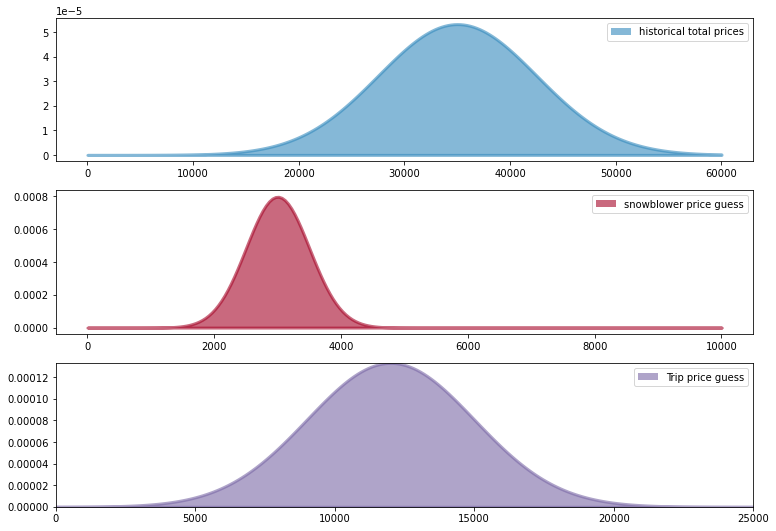

In [7]:
%matplotlib inline
import scipy.stats as stats
from IPython.core.pylabtools import figsize
import numpy as np
import matplotlib.pyplot as plt

figsize(12.5, 9)

norm_pdf = stats.norm.pdf

plt.subplot(311)
x = np.linspace(0, 60000, 200)
sp1 = plt.fill_between(x , 0, norm_pdf(x, 35000, 7500), 
                color = "#348ABD", lw = 3, alpha = 0.6,
                label = "historical total prices")
p1 = plt.Rectangle((0, 0), 1, 1, fc=sp1.get_facecolor()[0])
plt.legend([p1], [sp1.get_label()])

plt.subplot(312)
x = np.linspace(0, 10000, 200)
sp2 = plt.fill_between(x , 0, norm_pdf(x, 3000, 500), 
                 color = "#A60628", lw = 3, alpha = 0.6,
                 label="snowblower price guess")

p2 = plt.Rectangle((0, 0), 1, 1, fc=sp2.get_facecolor()[0])
plt.legend([p2], [sp2.get_label()])

plt.subplot(313)
x = np.linspace(0, 25000, 200)
sp3 = plt.fill_between(x , 0, norm_pdf(x, 12000, 3000), 
                 color = "#7A68A6", lw = 3, alpha = 0.6,
                 label = "Trip price guess")
plt.autoscale(tight=True)
p3 = plt.Rectangle((0, 0), 1, 1, fc=sp3.get_facecolor()[0])
plt.legend([p3], [sp3.get_label()]);

In [8]:
import pymc3 as pm

data_mu = [3e3, 12e3]

data_std =  [5e2, 3e3] 

mu_prior = 35e3
std_prior =  75e2
with pm.Model() as model:
    true_price = pm.Normal("true_price", mu=mu_prior, sd=std_prior)
    
    prize_1 = pm.Normal("first_prize", mu=data_mu[0], sd=data_std[0])
    prize_2 = pm.Normal("second_prize", mu=data_mu[1], sd=data_std[1])
    price_estimate = prize_1 + prize_2
    
    logp = pm.Normal.dist(mu=price_estimate, sd=(3e3)).logp(true_price)
    error = pm.Potential("error", logp)
    

    trace = pm.sample(50000, step=pm.Metropolis())
    burned_trace = trace[10000:]

price_trace = burned_trace["true_price"]

<ipython-input-8-a3d8e7b5655e>:20: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(50000, step=pm.Metropolis())
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [second_prize]
>Metropolis: [first_prize]
>Metropolis: [true_price]


Sampling 4 chains for 1_000 tune and 50_000 draw iterations (4_000 + 200_000 draws total) took 53 seconds.
The number of effective samples is smaller than 10% for some parameters.


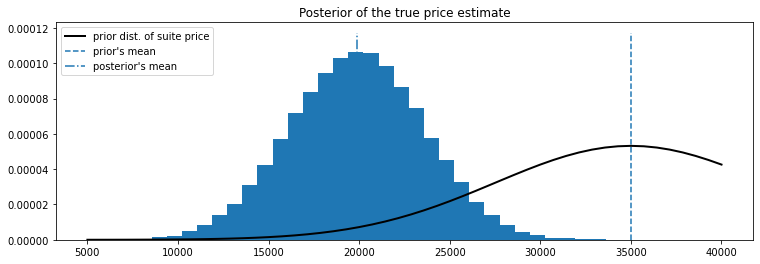

In [10]:
figsize(12.5, 4)

import scipy.stats as stats

x = np.linspace(5000, 40000)
plt.plot(x, stats.norm.pdf(x, 35000, 7500), c = "k", lw = 2, 
         label = "prior dist. of suite price")

_hist = plt.hist(price_trace, bins = 35, density= True, histtype= "stepfilled")
plt.title("Posterior of the true price estimate")
plt.vlines(mu_prior, 0, 1.1*np.max(_hist[0]), label = "prior's mean",
           linestyles="--")
plt.vlines(price_trace.mean(), 0, 1.1*np.max(_hist[0]), \
           label = "posterior's mean", linestyles="-.")
plt.legend(loc = "upper left");

请注意，因为我们两个观测奖品和随后的猜测（包括有关这些猜测不确定性），我们改变了我们的平均价格估计下跌约 15,000美元，从以前的平均价格。

一位常客，看到这两个奖品并对价格有相同的信念，就会竞标 μ1个+μ2个= 35000，无论有任何不确定性。同时，朴素的贝叶斯将仅选择后验分布的均值。但是，我们有更多关于最终结果的信息。我们应该将其纳入我们的出价中。我们将用损失函数上面找到最好的报价（最好根据我们的损失）。

参赛者的损失函数会是什么样？我认为它看起来像：

def showcase_loss(guess, true_price, risk = 80000):
    if true_price < guess:
        return risk
    elif abs(true_price - guess) <= 250:
        return -2*np.abs(true_price)
    else:
        return np.abs(true_price - guess - 250)

其中risk的一个参数定义了如果您的猜测超过真实价格会带来多严重的后果。较低的值risk表示您更愿意接受“翻身”的想法。如果我们确实出价不足，且差额小于250美元，我们将同时获得这两个奖项（此处建模为获得原始奖项的两倍）。否则，当我们true_price希望以较低的价格进行出价时，因此else损失是猜测与真实价格之间的距离的增加函数。

对于每个可能的出价，我们都会计算与该出价相关的预期损失。我们更改risk参数以查看它如何影响我们的损失：

<ipython-input-11-bee5c403e21c>:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  loss[close_mask] = -2*true_price[close_mask]
<ipython-input-11-bee5c403e21c>:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  loss[close_mask] = -2*true_price[close_mask]
<ipython-input-11-bee5c403e21c>:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a 

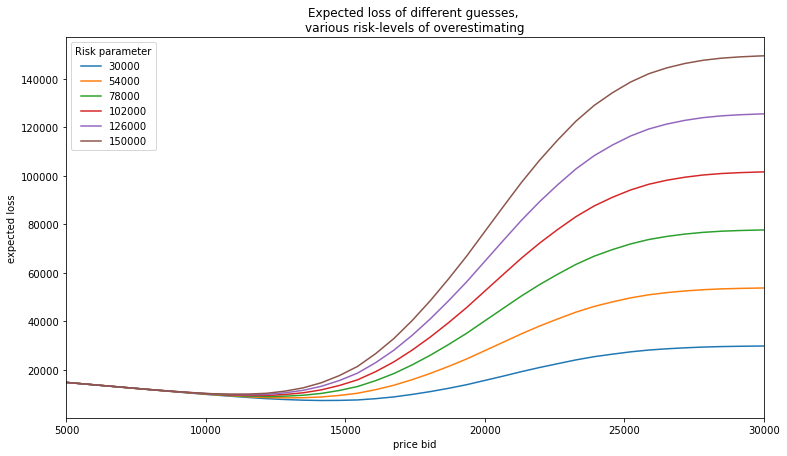

In [11]:
figsize(12.5, 7)
#numpy friendly showdown_loss


def showdown_loss(guess, true_price, risk = 80000):
        loss = np.zeros_like(true_price)
        ix = true_price < guess
        loss[~ix] = np.abs(guess - true_price[~ix])
        close_mask = [abs(true_price - guess) <= 250]
        loss[close_mask] = -2*true_price[close_mask]
        loss[ix] = risk
        return loss


guesses = np.linspace(5000, 50000, 70) 
risks = np.linspace(30000, 150000, 6)
expected_loss = lambda guess, risk: \
    showdown_loss(guess, price_trace, risk).mean()
        
for _p in risks:
    results = [expected_loss(_g, _p) for _g in guesses]
    plt.plot(guesses, results, label = "%d"%_p)
    
plt.title("Expected loss of different guesses, \nvarious risk-levels of \
overestimating")
plt.legend(loc="upper left", title="Risk parameter")
plt.xlabel("price bid")
plt.ylabel("expected loss")
plt.xlim(5000, 30000);

最大限度地减少我们的损失
选择使我们的预期损失最小的估计是明智的。这对应于以上每条曲线上的最小点。更正式地说，我们希望通过找到解决方案来最大程度地减少我们的预期损失

精氨酸分θ^Eθ[L （θ ，θ^）]
预期损失的最小值称为贝叶斯动作。我们可以使用Scipy的优化例程来解决贝叶斯动作。fmininscipy.optimize模块中的函数使用智能搜索来查找任何单变量或多元函数的最小值（不一定是全局最小值）。对于大多数目的，fmin将为您提供一个很好的答案。

我们将为上面的Showcase示例计算最小损失：

<ipython-input-11-bee5c403e21c>:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  loss[close_mask] = -2*true_price[close_mask]


minimum at risk 30000: 14576.60


<ipython-input-11-bee5c403e21c>:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  loss[close_mask] = -2*true_price[close_mask]


minimum at risk 54000: 13005.04


<ipython-input-11-bee5c403e21c>:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  loss[close_mask] = -2*true_price[close_mask]


minimum at risk 78000: 12220.65


<ipython-input-11-bee5c403e21c>:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  loss[close_mask] = -2*true_price[close_mask]


minimum at risk 102000: 11742.63


<ipython-input-11-bee5c403e21c>:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  loss[close_mask] = -2*true_price[close_mask]


minimum at risk 126000: 11280.31


<ipython-input-11-bee5c403e21c>:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  loss[close_mask] = -2*true_price[close_mask]


minimum at risk 150000: 11162.31


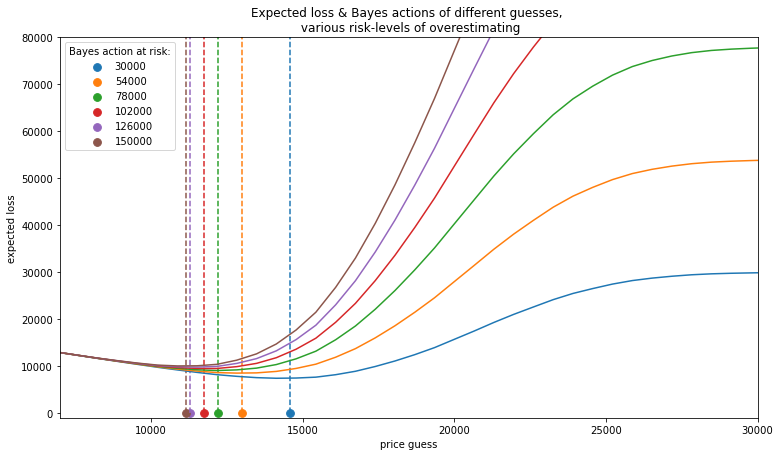

In [12]:
import scipy.optimize as sop

ax = plt.subplot(111)


for _p in risks:
    _color = next(ax._get_lines.prop_cycler)
    _min_results = sop.fmin(expected_loss, 15000, args=(_p,),disp = False)
    _results = [expected_loss(_g, _p) for _g in guesses]
    plt.plot(guesses, _results , color = _color['color'])
    plt.scatter(_min_results, 0, s = 60, \
                color= _color['color'], label = "%d"%_p)
    plt.vlines(_min_results, 0, 120000, color = _color['color'], linestyles="--")
    print("minimum at risk %d: %.2f" % (_p, _min_results))
                                    
plt.title("Expected loss & Bayes actions of different guesses, \n \
various risk-levels of overestimating")
plt.legend(loc="upper left", scatterpoints = 1, title = "Bayes action at risk:")
plt.xlabel("price guess")
plt.ylabel("expected loss")
plt.xlim(7000, 30000)
plt.ylim(-1000, 80000);

正如直觉所暗示的那样，随着我们降低风险阈值（降低对竞标的兴趣），我们提高了出价，愿意接近实际价格。有趣的是，我们的优化损失与后均值（大约为20000）相距多远。

可以说，在更高的维度上，无法将预期的损失降到最低是不可能的。因此，为什么我们需要使用Scipyfmin函数。

捷径
对于某些损失函数，以封闭形式已知贝叶斯动作。我们在下面列出其中一些：

如果使用均方损失，则贝叶斯作用是后验分布的均值，即
Eθ[ θ ]
最小化 Eθ[（θ -θ^）2个]。计算上，这需要我们计算后验样本的平均值[请参阅《大数定律》第4章]

而后验分布的中值使预期的绝对损失最小化。后验样本的样本中位数是对真实中位数的适当且非常准确的近似值。

实际上，有可能表明MAP估计是使用损失函数缩小到零一损失的解决方案。

也许现在很清楚，为什么在贝叶斯推断的数学中最常使用首次引入的损失函数：不需要复杂的优化。幸运的是，我们有机器为我们做复杂的事情。